In [1]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import  Dense,LSTM, Dropout, Dense
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf

In [2]:
#url = 'https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv'
dataset_train = yf.download('AAPL',
                      start='2010-01-01',
                      end='2021-01-31',
                      progress=False,
)

training_set = dataset_train.iloc[:, 1:2].values

In [3]:
print(dataset_train)

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2009-12-31    7.611786    7.619643    7.520000    7.526071    6.434926   
2010-01-04    7.622500    7.660714    7.585000    7.643214    6.535084   
2010-01-05    7.664286    7.699643    7.616071    7.656429    6.546383   
2010-01-06    7.656429    7.686786    7.526786    7.534643    6.442256   
2010-01-07    7.562500    7.571429    7.466071    7.520714    6.430345   
...                ...         ...         ...         ...         ...   
2021-01-25  143.070007  145.089996  136.539993  142.919998  141.655457   
2021-01-26  143.600006  144.300003  141.369995  143.160004  141.893341   
2021-01-27  143.429993  144.300003  140.410004  142.059998  140.803070   
2021-01-28  139.520004  141.990005  136.699997  137.089996  135.877029   
2021-01-29  135.830002  136.740005  130.210007  131.960007  130.792435   

               Volume  
Date         

In [4]:
print(training_set)

[[  7.61964321]
 [  7.66071415]
 [  7.69964314]
 ...
 [144.30000305]
 [141.99000549]
 [136.74000549]]


In [5]:
# 1- dataset = data + answers(SL)
url = 'https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv'

dataset_train = pd.read_csv(url)
training_set = dataset_train.iloc[:, 1:2].values
# Normalisation
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)
X_train = []
y_train = []

In [6]:
for i in range(60, len(dataset_train)):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])

In [7]:
X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [8]:
# 2- Model = 4 x (LSTM(units=50)+ Dropout(20%)) + Dense(units=1)
model = Sequential()

model.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50))
model.add(Dropout(0.2))

model.add(Dense(units=1))

model.compile(optimizer='adam',loss='mean_squared_error')

In [9]:
# 3- Train
model.fit(X_train,y_train,epochs=164,batch_size=64)

Epoch 1/164
31/31 [==============================] - 6s 181ms/step - loss: 0.0187
Epoch 2/164
31/31 [==============================] - 5s 149ms/step - loss: 0.0034
Epoch 3/164
31/31 [==============================] - 4s 126ms/step - loss: 0.0031
Epoch 4/164
31/31 [==============================] - 4s 119ms/step - loss: 0.0030
Epoch 5/164
31/31 [==============================] - 4s 120ms/step - loss: 0.0028
Epoch 6/164
31/31 [==============================] - 4s 116ms/step - loss: 0.0029
Epoch 7/164
31/31 [==============================] - 4s 129ms/step - loss: 0.0031
Epoch 8/164
31/31 [==============================] - 5s 161ms/step - loss: 0.0026
Epoch 9/164
31/31 [==============================] - 5s 154ms/step - loss: 0.0022
Epoch 10/164
31/31 [==============================] - 4s 145ms/step - loss: 0.0022
Epoch 11/164
31/31 [==============================] - 4s 139ms/step - loss: 0.0022
Epoch 12/164
31/31 [==============================] - 4s 117ms/step - loss: 0.0020
Epoch 13/164


31/31 [==============================] - 4s 131ms/step - loss: 6.8252e-04
Epoch 98/164
31/31 [==============================] - 4s 128ms/step - loss: 7.5817e-04
Epoch 99/164
31/31 [==============================] - 4s 125ms/step - loss: 7.4253e-04
Epoch 100/164
31/31 [==============================] - 4s 124ms/step - loss: 6.9592e-04
Epoch 101/164
31/31 [==============================] - 4s 126ms/step - loss: 7.8910e-04
Epoch 102/164
31/31 [==============================] - 4s 127ms/step - loss: 8.4403e-04
Epoch 103/164
31/31 [==============================] - 4s 124ms/step - loss: 7.9019e-04
Epoch 104/164
31/31 [==============================] - 4s 126ms/step - loss: 7.5174e-04
Epoch 105/164
31/31 [==============================] - 4s 135ms/step - loss: 7.4781e-04
Epoch 106/164
31/31 [==============================] - 4s 142ms/step - loss: 6.5593e-04
Epoch 107/164
31/31 [==============================] - 4s 129ms/step - loss: 7.3260e-04
Epoch 108/164
31/31 [===========================

In [10]:
# 4- Test

url = 'https://raw.githubusercontent.com/mwitiderrick/stockprice/master/tatatest.csv'


dataset_test = yf.download('AAPL',
                      start='2021-01-18',
                      end='2022-01-18',
                      progress=False,
)

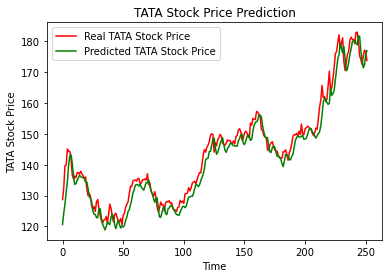

In [11]:
# real_stock_price
real_stock_price = dataset_test.iloc[:, 1:2].values
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, len(dataset_test)+60):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
# Prediction with model.predict(X_test)
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
# plot
plt.plot(real_stock_price, color = 'red', label = 'Real TATA Stock Price')
plt.plot(predicted_stock_price, color = 'green', label = 'Predicted TATA Stock Price')
plt.title('TATA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TATA Stock Price')
plt.legend()
plt.show()